# [Robust Principal Component Analysis:](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.648.1491&rep=rep1&type=pdf)
## Exact Recovery of Corrupted Low-Rank Matrices by Convex Optimization

The paper considers the problem of finding a matrix $A$, from some observations where $D = A + E$. They prove that $A$ can be extracted using a simple `convex optimization` algo. 

#### Assumptions:
1) Matrix $A$ is low rank<br>
2) Matrix $E$ is sparse<br>

### I Introduction
They start out by mentioning some of the limitations with traditional `PCA`, indicating that it is not good at handling outliers. 

They continue to discuss what current research inspired their approach, and further define their objective. 

To confirm these limitations, I graphed a couple of examples.

<bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>
[5.] [[-1.]]


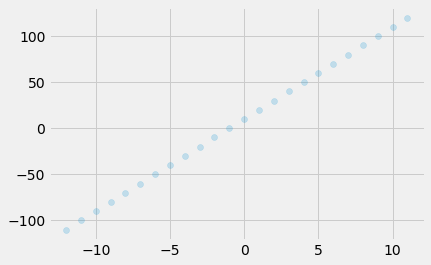

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
plt.style.use("fivethirtyeight")

m, b, n = 10, 10, 12
line = np.array([m * x + b for x in np.arange(-n, n)])
pca = PCA()
res = pca.fit_transform(line.reshape(-1, 1))
print(pca.get_covariance)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
#     print(v1, v0, arrowprops)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig = plt.figure()
plt.scatter(np.arange(-n, n), line, alpha=0.2);
print(pca.mean_, pca.components_)

### II Problem Setting and Main Results
The authors formally define the problem as:<br>
Given $D = A + E$, where $A$ and $E$ are unknown, but $A$ is known to be low rank, and $E$ is known to be sparse, recover $A$

They argue that a conceptual solution would be a non-convex optimization problem that doesn't have a known solution:

$min_{A,E}~rank(A) + \gamma||E||_0~subj~A + E = D$

It's intractable because of the $l^0$ norm on $E$. 

Instead, we can simplify it by relaxing the problem. Replace the: 
* $l^0$ norm with a $l^1$ norm
* rank(A) with it's nuclear norm $||A||_* = \sum_i \sigma_i(A)$

This is later simplified to the following — for almost all pairs $(A_0, E_0)$ consisting of a low rank matrix $A_0$ and a sparse matrix $E_0$:<br> 
$(A_0, E_0) = arg~min_{A, E}~||A||_* +_ \lambda||E||_1~subj~A + E = A_0 + E_0$ 

$\lambda$ in this case is the regularization parameter which is set to $\lambda = m^{-\frac{1}{2}}$